In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
feats = pd.read_csv("../data/processed/train_features.csv")
target = pd.read_csv("../data/processed/train_target.csv")

feats.set_index('card_id', inplace=True)
target.set_index('card_id', inplace=True)

# Target

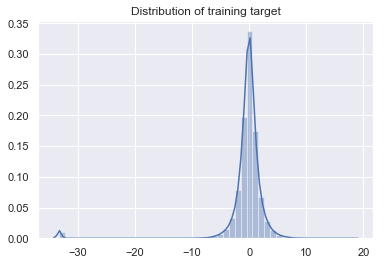

In [3]:
sns.set()
ax = sns.distplot(target)

ax.set_title("Distribution of training target")

plt.show()

# Features

In [4]:
feats = feats.merge(target, on='card_id')

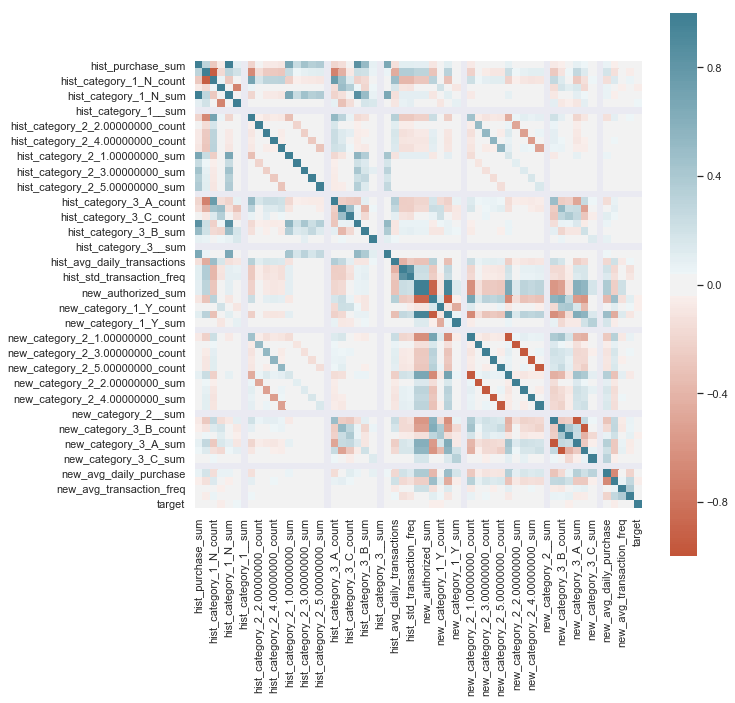

In [5]:
corr_data = feats.corr()

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.set()
sns.heatmap(corr_data, 
            vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(20, 220, n=200),
            square=True,
            ax=ax)

plt.show()